In [10]:
import pandas as pd
import numpy as np


import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px


from sklearn.preprocessing import MinMaxScaler,StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score,confusion_matrix, classification_report,roc_curve
from sklearn.decomposition import PCA

import warnings
warnings.filterwarnings('ignore')

## Step 2: Data Gathering

In [11]:
df = pd.read_csv(r"D:\Jupyter python\New Datasets\wine.csv")
df

,Alcohol,Malic.acid,Ash,Acl,Mg,Phenols,Flavanoids,Nonflavanoid.phenols,Proanth,Color.int,Hue,OD,Proline,Wine
0,14.23,1.71,2.43,15.6,127,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065,1
1,13.20,1.78,2.14,11.2,100,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050,1
2,13.16,2.36,2.67,18.6,101,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185,1
3,14.37,1.95,2.50,16.8,113,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480,1
4,13.24,2.59,2.87,21.0,118,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
173,13.71,5.65,2.45,20.5,95,1.68,0.61,0.52,1.06,7.70,0.64,1.74,740,3
174,13.40,3.91,2.48,23.0,102,1.80,0.75,0.43,1.41,7.30,0.70,1.56,750,3
175,13.27,4.28,2.26,20.0,120,1.59,0.69,0.43,1.35,10.20,0.59,1.56,835,3
176,13.17,2.59,2.37,20.0,120,1.65,0.68,0.53,1.46,9.30,0.60,1.62,840,3


## Step 3: EDA

In [12]:
df.shape

(178, 14)

In [13]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 178 entries, 0 to 177
Data columns (total 14 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Alcohol               178 non-null    float64
 1   Malic.acid            178 non-null    float64
 2   Ash                   178 non-null    float64
 3   Acl                   178 non-null    float64
 4   Mg                    178 non-null    int64  
 5   Phenols               178 non-null    float64
 6   Flavanoids            178 non-null    float64
 7   Nonflavanoid.phenols  178 non-null    float64
 8   Proanth               178 non-null    float64
 9   Color.int             178 non-null    float64
 10  Hue                   178 non-null    float64
 11  OD                    178 non-null    float64
 12  Proline               178 non-null    int64  
 13  Wine                  178 non-null    int64  
dtypes: float64(11), int64(3)
memory usage: 19.6 KB


In [14]:
df.isna().sum()

Alcohol                 0
Malic.acid              0
Ash                     0
Acl                     0
Mg                      0
Phenols                 0
Flavanoids              0
Nonflavanoid.phenols    0
Proanth                 0
Color.int               0
Hue                     0
OD                      0
Proline                 0
Wine                    0
dtype: int64

In [15]:
df.describe()

,Alcohol,Malic.acid,Ash,Acl,Mg,Phenols,Flavanoids,Nonflavanoid.phenols,Proanth,Color.int,Hue,OD,Proline,Wine
count,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000
mean,13.000618,2.336348,2.366517,19.494944,99.741573,2.295112,2.029270,0.361854,1.590899,5.058090,0.957449,2.611685,746.893258,1.938202
std,0.811827,1.117146,0.274344,3.339564,14.282484,0.625851,0.998859,0.124453,0.572359,2.318286,0.228572,0.709990,314.907474,0.775035
min,11.030000,0.740000,1.360000,10.600000,70.000000,0.980000,0.340000,0.130000,0.410000,1.280000,0.480000,1.270000,278.000000,1.000000
25%,12.362500,1.602500,2.210000,17.200000,88.000000,1.742500,1.205000,0.270000,1.250000,3.220000,0.782500,1.937500,500.500000,1.000000
50%,13.050000,1.865000,2.360000,19.500000,98.000000,2.355000,2.135000,0.340000,1.555000,4.690000,0.965000,2.780000,673.500000,2.000000
75%,13.677500,3.082500,2.557500,21.500000,107.000000,2.800000,2.875000,0.437500,1.950000,6.200000,1.120000,3.170000,985.000000,3.000000
max,14.830000,5.800000,3.230000,30.000000,162.000000,3.880000,5.080000,0.660000,3.580000,13.000000,1.710000,4.000000,1680.000000,3.000000


## Step 4 : Feature Engineering

#### To find outliers

In [16]:
Q1 = df.quantile(0.25)
Q3 = df.quantile(0.75)
IQR = Q3-Q1

lower_tail = Q1- 1.5 * IQR
upper_tail = Q3+ 1.5 * IQR

outliers = (df < lower_tail) | (df > upper_tail)
outliers_count = outliers.sum()
outliers_count

Alcohol                 0
Malic.acid              3
Ash                     3
Acl                     4
Mg                      4
Phenols                 0
Flavanoids              0
Nonflavanoid.phenols    0
Proanth                 2
Color.int               4
Hue                     1
OD                      0
Proline                 0
Wine                    0
dtype: int64

#### To replace outliers

In [17]:
def Finding_outliar1(df,columns):
    for column in columns:
            q1 = df[column].quantile(0.25)
            q3 = df[column].quantile(0.75)
            iqr = q3 - q1

            lower_tail1 = q1 - 1.5 * iqr
            upper_tail1 = q3 + 1.5 * iqr
            print(lower_tail1)
            print(upper_tail1)
            
            df[column] = df[column].apply(lambda x : upper_tail1 if x > upper_tail1 else (lower_tail1 if x < lower_tail1 else x))
columns = ["Malic.acid","Ash","Acl","Mg","Proanth","Color.int","Hue"]
Finding_outliar1(df,columns)

-0.6174999999999997
5.3025
1.6887499999999998
3.0787500000000003
10.749999999999998
27.950000000000003
59.5
135.5
0.20000000000000018
3.0
-1.2500000000000009
10.670000000000002
0.2762499999999998
1.6262500000000002


# PCA

In [18]:
Std = StandardScaler()
Standard_array = Std.fit_transform(df.iloc[:,:20])
Df_Std = pd.DataFrame(Standard_array, columns = df.iloc[:,:20].columns)
Df_Std.head()

,Alcohol,Malic.acid,Ash,Acl,Mg,Phenols,Flavanoids,Nonflavanoid.phenols,Proanth,Color.int,Hue,OD,Proline,Wine
0,1.518613,-0.565534,0.240640,-1.182882,2.057111,0.808997,1.034819,-0.659563,1.264740,0.266954,0.366610,1.847920,1.013009,-1.213944
1,0.246290,-0.501728,-0.862176,-2.524956,0.038639,0.568648,0.733629,-0.820719,-0.549904,-0.291923,0.410768,1.113449,0.965242,-1.213944
2,0.196879,0.026948,1.153315,-0.267832,0.113397,0.808997,1.215533,-0.498407,2.199012,0.284696,0.322451,0.788587,1.395148,-1.213944
3,1.691550,-0.346771,0.506837,-0.816862,1.010496,2.491446,1.466525,-0.981875,1.067105,1.225029,-0.428246,1.184071,2.334574,-1.213944
4,0.295700,0.236596,1.913878,0.464208,1.384287,0.808997,0.663351,0.226796,0.420301,-0.318536,0.366610,0.449601,-0.037874,-1.213944


In [19]:
x = Df_Std.values
x

array([[ 1.51861254, -0.56553422,  0.24064008, ...,  1.84791957,
         1.01300893, -1.21394365],
       [ 0.24628963, -0.50172839, -0.86217567, ...,  1.1134493 ,
         0.96524152, -1.21394365],
       [ 0.19687903,  0.02694849,  1.15331518, ...,  0.78858745,
         1.39514818, -1.21394365],
       ...,
       [ 0.33275817,  1.77705125, -0.40583812, ..., -1.48544548,
         0.28057537,  1.37386437],
       [ 0.20923168,  0.23659622,  0.0124713 , ..., -1.40069891,
         0.29649784,  1.37386437],
       [ 1.39508604,  1.61297912,  1.41951209, ..., -1.42894777,
        -0.59516041,  1.37386437]])

In [20]:
y = df.iloc[:,-1].values
y

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 3, 3,
       3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3,
       3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3,
       3, 3], dtype=int64)

### Model training

In [21]:
xtrain,xtest,ytrain,ytest=train_test_split(x,y,test_size=0.3,random_state=0,stratify=y)

In [22]:
PCA_1= PCA(n_components=None)
xtrain = PCA_1.fit_transform(xtrain)
xtest  = PCA_1.fit_transform(xtest)

In [23]:
PCA_1.explained_variance_ratio_

array([0.40405744, 0.21698432])

In [35]:
log1 = LogisticRegression(multi_class="ovr")
log_model1 = log1.fit(xtrain,ytrain)
log_model1

LogisticRegression(multi_class='ovr')

##### training

In [36]:
ytrain 

array([3, 1, 1, 1, 3, 2, 2, 3, 2, 2, 2, 1, 2, 3, 1, 3, 2, 1, 3, 3, 2, 1,
       2, 2, 2, 2, 3, 1, 2, 2, 1, 1, 3, 1, 2, 1, 1, 2, 3, 3, 1, 3, 3, 3,
       1, 2, 3, 3, 2, 3, 2, 2, 2, 1, 2, 2, 3, 3, 2, 1, 1, 2, 3, 3, 2, 1,
       2, 2, 2, 1, 1, 1, 1, 1, 3, 1, 2, 3, 2, 2, 3, 1, 2, 1, 2, 2, 3, 2,
       1, 1, 1, 3, 2, 1, 1, 2, 2, 3, 3, 2, 1, 1, 2, 2, 3, 1, 3, 1, 2, 2,
       2, 2, 1, 3, 1, 1, 1, 1, 2, 2, 3, 3, 2, 2], dtype=int64)

In [37]:
ytrain_pred = log_model1.predict(xtrain)
ytrain_pred

array([3, 1, 1, 1, 3, 2, 2, 3, 2, 2, 2, 1, 2, 3, 1, 3, 2, 1, 3, 3, 2, 1,
       2, 2, 2, 2, 3, 1, 2, 3, 1, 1, 3, 1, 2, 1, 1, 2, 3, 3, 1, 3, 3, 3,
       1, 2, 3, 3, 2, 3, 2, 2, 2, 1, 2, 2, 3, 3, 2, 1, 1, 2, 3, 3, 2, 1,
       2, 2, 2, 1, 1, 1, 1, 1, 3, 1, 1, 3, 2, 2, 3, 1, 2, 1, 2, 2, 3, 2,
       1, 1, 1, 3, 2, 1, 1, 2, 2, 3, 3, 2, 1, 1, 2, 2, 3, 1, 3, 1, 2, 2,
       2, 2, 1, 3, 1, 1, 1, 1, 2, 2, 3, 3, 2, 2], dtype=int64)

In [38]:
accuracy = accuracy_score(ytrain,ytrain_pred)
print(f"Accuracy : {accuracy}")

Accuracy : 0.9838709677419355


In [39]:
Training_confusion_matrix = confusion_matrix(ytrain,ytrain_pred)
print(Training_confusion_matrix)

[[41  0  0]
 [ 1 48  1]
 [ 0  0 33]]


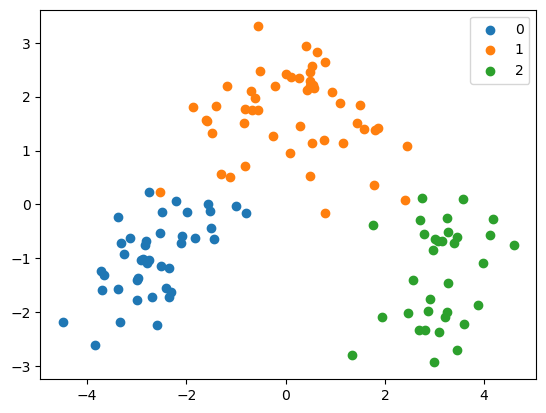

In [40]:
X_set,y_set = xtrain, ytrain

plt.scatter(X_set[y_set==1,0],X_set[y_set==1,1], label=0)
plt.scatter(X_set[y_set==2,0],X_set[y_set==2,1],label=1)
plt.scatter(X_set[y_set==3,0],X_set[y_set==3,1], label=2)
 
plt.legend()                                     
plt.show()

#### testing

In [41]:
ytest 

array([1, 2, 1, 1, 2, 3, 2, 3, 1, 3, 1, 2, 3, 1, 3, 3, 1, 1, 3, 2, 1, 3,
       2, 2, 2, 2, 1, 3, 3, 2, 1, 3, 1, 2, 2, 1, 2, 1, 1, 3, 3, 2, 2, 2,
       1, 2, 2, 3, 2, 3, 2, 2, 1, 1], dtype=int64)

In [42]:
ytest_pred = log_model1.predict(xtest)
ytest_pred

array([1, 2, 1, 1, 2, 3, 2, 3, 1, 3, 1, 2, 3, 1, 3, 3, 1, 1, 3, 1, 1, 3,
       2, 2, 2, 2, 1, 3, 3, 2, 1, 3, 1, 2, 2, 1, 2, 2, 1, 3, 3, 2, 2, 2,
       1, 2, 2, 3, 2, 3, 2, 2, 1, 1], dtype=int64)

In [43]:
accuracy = accuracy_score(ytest,ytest_pred)
print(f"Accuracy : {accuracy}")

Accuracy : 0.9629629629629629


In [44]:
testing_confusion_matrix = confusion_matrix(ytest,ytest_pred)
print(testing_confusion_matrix)

[[17  1  0]
 [ 1 20  0]
 [ 0  0 15]]


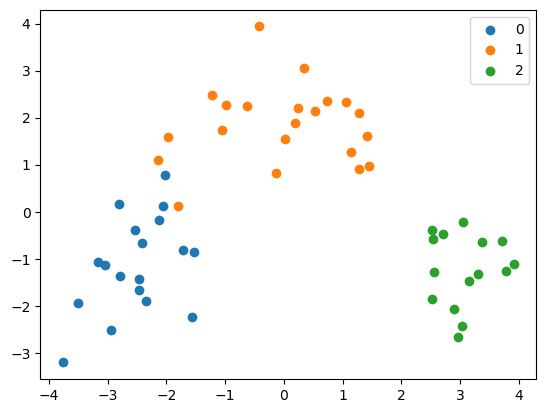

In [45]:
X_set,y_set = xtest, ytest

plt.scatter(X_set[y_set==1,0],X_set[y_set==1,1], label=0)
plt.scatter(X_set[y_set==2,0],X_set[y_set==2,1],label=1)
plt.scatter(X_set[y_set==3,0],X_set[y_set==3,1], label=2)
 
plt.legend()                                     
plt.show()